In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.interpolate import UnivariateSpline

In [78]:
x = np.linspace(0, 100000, 1000)
dist = [
    (0.75, lognorm(s=1, scale=10000)),
    (0.1, norm(loc=50000, scale=5000)),
    (0.05, norm(loc=10000, scale=1500)),
    (0.05, norm(loc=30000, scale=5000)),
    (0.01, norm(loc=80000, scale=2000)),
    (0.005, norm(loc=90000, scale=500))
]
Fx = sum([p * d.cdf(x) for p, d in dist]) / sum(p for p, d in dist)
fx = sum([p * d.pdf(x) for p, d in dist]) / sum(p for p, d in dist)



Fx = bra.cdf(x)
fx = bra.pdf(x)
dfx = np.pad(fx[1:]-fx[:-1],[1,0],'constant',constant_values=float("NaN"))
ddfx = np.pad(dfx[1:]-dfx[:-1],[0,1],'constant',constant_values=float("NaN"))
abs_ddfx = np.abs(ddfx)

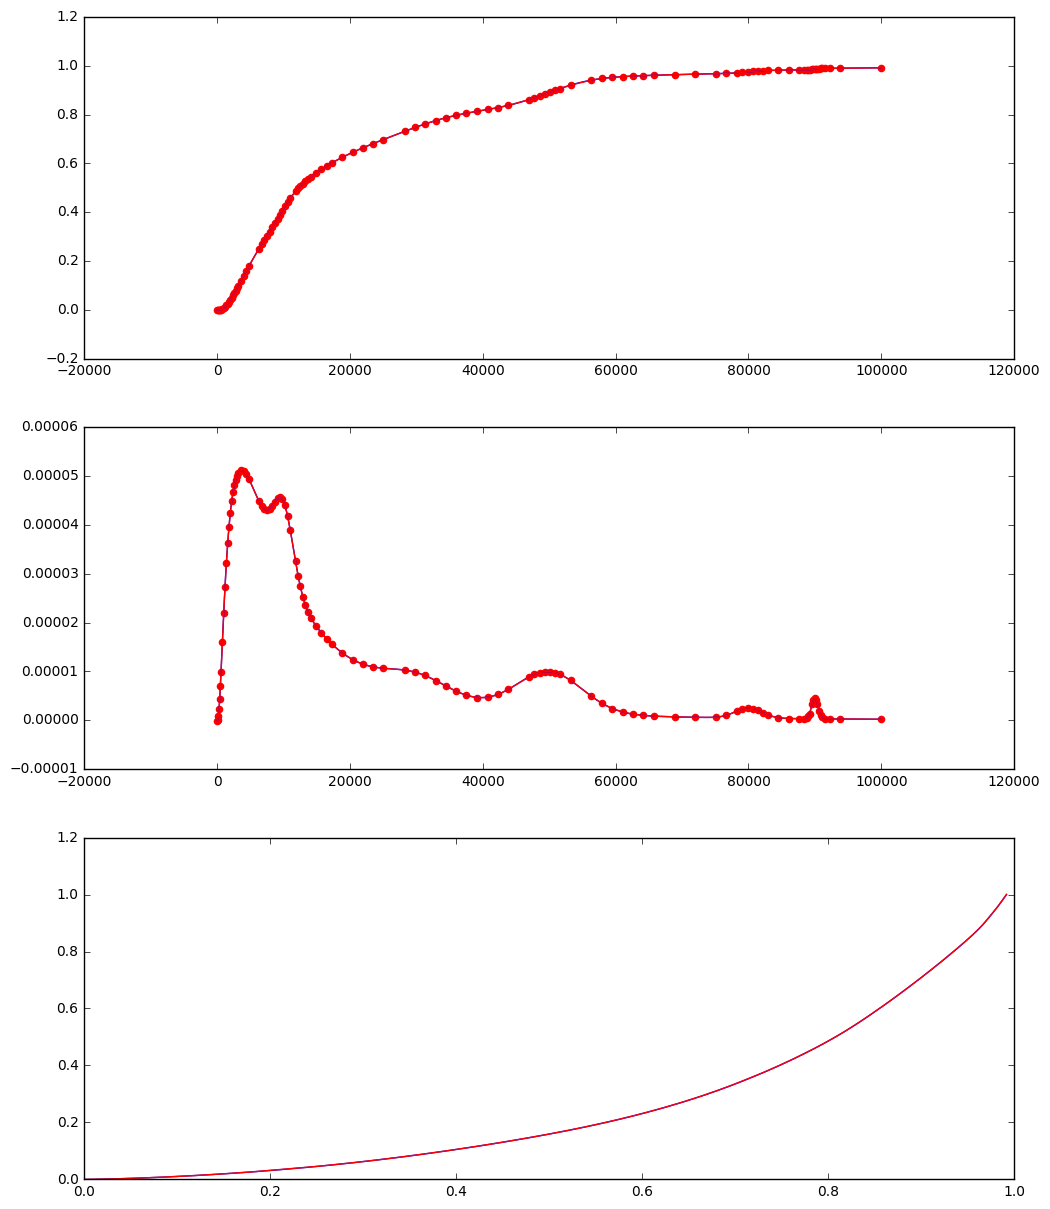

In [121]:
##########################################
plt.rcParams["figure.figsize"] = (12,15)
fig, ax = plt.subplots(3, 1)
##########################################
K = 100

smoothing = 1
direction = None
adjustment = 2
for iterations in range(100): # maximum iterations
    spline_fx = UnivariateSpline(x, fx, k=1, s=smoothing)
    knots = spline_fx.get_knots()
    if (len(knots)==K):
        break
    elif (len(knots) > K):
        if (direction == -1):
            adjustment /= 2
        smoothing *= adjustment
        direction = 1
    elif (len(knots) < K):
        if (direction == 1):
            adjustment /= 2
        smoothing /= adjustment
        direction = -1

ax[0].plot(x,Fx)
ax[0].plot(knots,spline_fx.antiderivative()(knots),color="r")
ax[0].scatter(knots,spline_fx.antiderivative()(knots),color="r")

ax[1].plot(x,fx)
ax[1].plot(x,spline_fx(x),color="r")
ax[1].scatter(knots,spline_fx(knots),color="r")

mean = sum(((x[1:] - x[:-1])*(x[1:] + x[:-1])/2*spline_fx((x[1:] + x[:-1])/2)))
ax[2].plot(spline_fx.antiderivative()(x[1:]), np.cumsum(((x[1:] - x[:-1])*(x[1:] + x[:-1])/2*spline_fx((x[1:] + x[:-1])/2)))/mean)
ax[2].plot(spline_fx.antiderivative()(knots[1:]), np.cumsum(((knots[1:] - knots[:-1])*(knots[1:] + knots[:-1])/2*spline_fx((knots[1:] + knots[:-1])/2)))/mean, "r")

#ax[2].plot(spline_fx.antiderivative()(knots), np.cumsum(knots)/mean,"r")

In [114]:
knots

array([      0.        ,     100.1001001 ,     200.2002002 ,
           300.3003003 ,     400.4004004 ,     500.5005005 ,
           600.6006006 ,     800.8008008 ,    1001.001001  ,
          1201.2012012 ,    1401.4014014 ,    1601.6016016 ,
          1801.8018018 ,    2002.002002  ,    2202.2022022 ,
          2402.4024024 ,    2602.6026026 ,    2802.8028028 ,
          3003.003003  ,    3203.2032032 ,    3603.6036036 ,
          4004.004004  ,    4404.4044044 ,    4804.8048048 ,
          6306.30630631,    6706.70670671,    7107.10710711,
          7507.50750751,    7907.90790791,    8308.30830831,
          8708.70870871,    9109.10910911,    9409.40940941,
          9809.80980981,   10210.21021021,   10610.61061061,
         11011.01101101,   11811.81181181,   12212.21221221,
         12512.51251251,   12912.91291291,   13313.31331331,
         13713.71371371,   14114.11411411,   14914.91491491,
         15715.71571572,   16516.51651652,   17317.31731732,
         18818.81881882,

In [119]:
print(spline_fx(knots).tolist())

[-7.00170692036934e-08, 1.0947698984041765e-07, 7.875501460248058e-07, 2.233225641141353e-06, 4.367748843994068e-06, 6.982827630431993e-06, 9.883968818968741e-06, 1.5993319418932447e-05, 2.1942528496166424e-05, 2.7364251973301945e-05, 3.2128566113229755e-05, 3.6216509175664014e-05, 3.966022097706759e-05, 4.251482104287394e-05, 4.484330961707371e-05, 4.6708800806492374e-05, 4.8170734661740725e-05, 4.9282533112208486e-05, 5.009365098256787e-05, 5.067629256107429e-05, 5.116587136598674e-05, 5.0977455222565017e-05, 5.033101037603566e-05, 4.940432804104205e-05, 4.4841847526280174e-05, 4.390070838596992e-05, 4.3267392246011555e-05, 4.306643318209113e-05, 4.332385382364866e-05, 4.3965082540462756e-05, 4.479142209702402e-05, 4.546798330093391e-05, 4.568981883260911e-05, 4.5345383510587105e-05, 4.4078525351016345e-05, 4.191109313518956e-05, 3.904687471932377e-05, 3.252140510902292e-05, 2.9513644896766766e-05, 2.753462220785759e-05, 2.530556930014244e-05, 2.3542659288529663e-05, 2.21564232069153